In [64]:
import pandas as pd
import os
import numpy as np
import re

pd.set_option('display.max_colwidth', None)
# os.chdir('/Users/fenn/Documents/PhDProjects/MCB/ATAC-seq/peakAnnotation')
os.chdir('/Users/fenn/Documents/PhDProjects/MCB/ATAC-seq/annotation/')
os.listdir()

['PeakAnnotation_MCB_LPS.csv']

In [38]:
annoPeak.columns

Index(['seqnames', 'start', 'end', 'width', 'strand', 'id', 'annotation',
       'geneChr', 'geneStart', 'geneEnd', 'geneLength', 'geneStrand', 'geneId',
       'transcriptId', 'distanceToTSS', 'ENSEMBL', 'SYMBOL', 'GENENAME',
       'DMSO', 'RAW-LPS', 'LPS', 'RAW-LPS-MCB', 'LPS-MCB', 'RAW-MCB', 'MCB'],
      dtype='object')

In [94]:
annoPeak = pd.read_csv('/Users/fenn/Documents/PhDProjects/MCB/ATAC-seq/Peaks/Peak_anno_LPS-Up_regulated.csv')
annoPeak

,seqnames,start,end,width,strand,V4,annotation,geneChr,geneStart,geneEnd,geneLength,geneStrand,geneId,transcriptId,distanceToTSS,ENSEMBL,SYMBOL,GENENAME
0,chr1,4878102,4878110,9,*,*,3' UTR,1,4858038,4897909,39872,1,21399,ENSMUST00000165720.2,20064,ENSMUSG00000033813,Tcea1,transcription elongation factor A (SII) 1
1,chr1,4928052,4928060,9,*,*,"Intron (ENSMUST00000002533.14/58175, intron 1 of 4)",1,4858038,4897909,39872,1,21399,ENSMUST00000165720.2,70014,ENSMUSG00000033813,Tcea1,transcription elongation factor A (SII) 1
2,chr1,4928102,4928110,9,*,*,"Intron (ENSMUST00000002533.14/58175, intron 1 of 4)",1,4858038,4897909,39872,1,21399,ENSMUST00000165720.2,70064,ENSMUSG00000033813,Tcea1,transcription elongation factor A (SII) 1
3,chr1,4928152,4928160,9,*,*,"Intron (ENSMUST00000002533.14/58175, intron 1 of 4)",1,4858038,4897909,39872,1,21399,ENSMUST00000165720.2,70114,ENSMUSG00000033813,Tcea1,transcription elongation factor A (SII) 1
4,chr1,4928352,4928360,9,*,*,"Intron (ENSMUST00000002533.14/58175, intron 1 of 4)",1,4858038,4897909,39872,1,21399,ENSMUST00000165720.2,70314,ENSMUSG00000033813,Tcea1,transcription elongation factor A (SII) 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4244,chrX,162741602,162741610,9,*,*,Distal Intergenic,20,162735078,162736613,1536,2,102640117,ENSMUST00000136472.1,-4989,ENSMUSG00000086034,Gm15201,predicted gene 15201
4245,chrX,162741652,162741660,9,*,*,Distal Intergenic,20,162735078,162736613,1536,2,102640117,ENSMUST00000136472.1,-5039,ENSMUSG00000086034,Gm15201,predicted gene 15201
4246,chrX,166165152,166165160,9,*,*,Distal Intergenic,20,166170454,166189804,19351,1,237221,ENSMUST00000130880.8,-5294,ENSMUSG00000040621,Gemin8,gem nuclear organelle associated protein 8
4247,chrX,168103152,168103160,9,*,*,"Intron (ENSMUST00000112147.8/333605, intron 3 of 19)",20,167473973,168122826,648854,2,333605,ENSMUST00000112146.8,19666,ENSMUSG00000049176,Frmpd4,FERM and PDZ domain containing 4


In [80]:
DE_Peaks_LPS = annoPeak.loc[:,['id', 'SYMBOL', 'DMSO', 'LPS']]
DE_Peaks_LPS['log2FC'] = np.log2(((DE_Peaks_LPS['LPS']+1)/(DE_Peaks_LPS['DMSO']+1))+1)
DE_Peaks_LPS = DE_Peaks_LPS.sort_values('log2FC', ascending=False)
DE_Peaks_LPS = DE_Peaks_LPS.dropna(subset='SYMBOL').reset_index(drop=True)
DE_Peaks_LPS

,id,SYMBOL,DMSO,LPS,log2FC
0,Peak00563893,Slc25a45,0,3665,11.840385
1,Peak00298537,Aasdhppt,0,2446,11.257388
2,Peak00483976,Klf10,0,2191,11.098690
3,Peak00299479,Tmem123,0,1737,10.764042
4,Peak00299510,Birc2,0,1583,10.630267
...,...,...,...,...,...
102669,Peak00451082,2610042L04Rik,112,0,0.012711
102670,Peak00526227,Abca3,115,0,0.012384
102671,Peak00527621,Ilrun,140,0,0.010196
102672,Peak00004324,Lmbrd1,15628,36,0.003411


In [81]:
sigDE_Peaks = DE_Peaks_LPS[DE_Peaks_LPS['log2FC']>5]
genes = sigDE_Peaks['SYMBOL'].drop_duplicates()
len(genes)

3520

In [110]:
pd.set_option('display.max_columns',12)

In [97]:
DEGs_genes = pd.read_csv('/Users/fenn/Documents/PhDProjects/MCB/ATAC-seq/Peaks/peakAnnotation/DEGs_Genes_LPS_MCB.csv')
DEGs_genes
DEGs_genes_ATAC = set(DEGs_genes['SYMBOL'])
len(DEGs_genes_ATAC)

,SYMBOL
0,Gm46206
1,1700034P13Rik
2,Arfgef1
3,Mcm3
4,Bag2
...,...
892,Ptchd1
893,Ctps2
894,Zrsr2
895,Asmt


In [95]:
# sigDE_Peaks = DE_Peaks_LPS[DE_Peaks_LPS['log2FC']>5]
genes = annoPeak['SYMBOL'].drop_duplicates()
len(genes)

2089

In [86]:
sigDE_Peaks[sigDE_Peaks['SYMBOL'].str.contains('^Tnf', flags=re.IGNORECASE)].reset_index(drop=True)

,id,SYMBOL,DMSO,LPS,log2FC
0,Peak00268940,Tnfrsf23,0,55,5.832890
1,Peak00158355,Tnfrsf8,0,51,5.727920
2,Peak00020234,Tnfrsf11a,0,36,5.247928
3,Peak00342074,Tnfaip3,0,35,5.209453
4,Peak00268928,Tnfrsf22,0,31,5.044394


In [92]:
data = pd.read_csv('/Users/fenn/Documents/PhDProjects/MCB/ATAC-seq/Peaks/LPS_DMSO_DE_Peaks.csv')
data = data.drop(['ID', 'width'], axis=1)
data.to_csv('/Users/fenn/Documents/PhDProjects/MCB/ATAC-seq/Peaks/LPS_DMSO_DE_Peaks.bed',index=None, sep='\t')

In [60]:
genes.to_clipboard(index=None)

In [50]:
DE_Peaks_LPS.loc[:,['DMSO', 'LPS']].apply(sum, axis=0)

DMSO    1090917
LPS     7956423
dtype: int64

In [36]:
annoPeak = pd.read_csv('PeakAnnotation_MCB_LPS.csv')
annoPeak

,seqnames,start,end,width,strand,id,annotation,geneChr,geneStart,geneEnd,...,ENSEMBL,SYMBOL,GENENAME,DMSO,RAW-LPS,LPS,RAW-LPS-MCB,LPS-MCB,RAW-MCB,MCB
0,chr1,4325966,4329262,3297,*,Peak00001083,"Intron (ENSMUST00000208660.1/19888, intron 3 of 29)",1,4344146,4360314,...,ENSMUSG00000025900,Rp1,retinitis pigmentosa 1 (human),14,0,56,0,0,2,17
1,chr1,4561853,4564127,2275,*,Peak00001122,Distal Intergenic,1,4491390,4497354,...,ENSMUSG00000025902,Sox17,SRY (sex determining region Y)-box 17,16,0,204,0,0,0,15
2,chr1,4594598,4596265,1668,*,Peak00001127,Distal Intergenic,1,4491390,4497354,...,ENSMUSG00000025902,Sox17,SRY (sex determining region Y)-box 17,7,0,78,0,0,0,7
3,chr1,4715369,4716689,1321,*,Peak00001163,Distal Intergenic,1,4783572,4785692,...,ENSMUSG00000033845,Mrpl15,mitochondrial ribosomal protein L15,11,0,36,0,0,0,33
4,chr1,4758254,4759163,910,*,Peak00001174,Distal Intergenic,1,4783572,4785692,...,ENSMUSG00000033845,Mrpl15,mitochondrial ribosomal protein L15,8,0,64,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102719,chrY,90809864,90812541,2678,*,Peak00605227,"Intron (ENSMUST00000179483.8/170942, intron 3 of 3)",21,90790451,90816465,...,ENSMUSG00000096768,Erdr1,erythroid differentiation regulator 1,6,0,111,0,27,0,9
102720,chrY,90814005,90816702,2698,*,Peak00605229,"Exon (ENSMUST00000179483.8/170942, exon 4 of 4)",21,90790451,90816465,...,ENSMUSG00000096768,Erdr1,erythroid differentiation regulator 1,11,0,139,0,10,3,3
102721,chrY,90816854,90819351,2498,*,Peak00605230,Distal Intergenic,21,90790451,90816465,...,ENSMUSG00000096768,Erdr1,erythroid differentiation regulator 1,3,0,47,1,4,0,9
102722,chrY,90820495,90828106,7612,*,Peak00605232,Distal Intergenic,21,90790451,90816465,...,ENSMUSG00000096768,Erdr1,erythroid differentiation regulator 1,13,1,29,0,26,0,12


In [123]:
LPSPeak = annoPeak.loc[:,['seqnames', 'start', 'end', 'strand', 'id','LPS-MCB']]
LPSPeak = LPSPeak[LPSPeak['LPS-MCB']>25].reset_index(drop=True)
LPSPeak

,seqnames,start,end,strand,id,LPS-MCB
0,chr1,6283999,6285959,*,Peak00001405,37
1,chr1,7158126,7160389,*,Peak00001560,85
2,chr1,7465659,7466174,*,Peak00001623,31
3,chr1,7466882,7468975,*,Peak00001626,57
4,chr1,9614857,9617039,*,Peak00001910,54
...,...,...,...,...,...,...
9631,chrY,11857688,11858576,*,Peak00590112,32
9632,chrY,90749002,90756400,*,Peak00605209,288
9633,chrY,90809864,90812541,*,Peak00605227,27
9634,chrY,90820495,90828106,*,Peak00605232,26


In [117]:
LPSDir = '/Users/fenn/Documents/PhDProjects/MCB/ATAC-seq/peakCalled/annoSingle/LPS/'

In [124]:
LPSPeak.to_csv(LPSDir + 'LPS-MCB_Peak_9635.bed', sep='\t', index=None)

In [111]:
bwSignal = pd.read_table('/Users/fenn/Documents/PhDProjects/MCB/ATAC-seq/peakCalled/srted-RAW-LPS-1.srt.narrowPeak')
bwSignal['width'] = bwSignal['ChromEnd'] - bwSignal['chromStart']
bwSignal

,chrom,chromStart,ChromEnd,name,score,strand,signalValue,pValue,qValue,PeakPos,width
0,chr1,3051899,3051999,peak_0,1000,.,573.785950,7.038889,-1,50,100
1,chr1,3052101,3052201,peak_1,1000,.,573.785950,7.038889,-1,50,100
2,chr1,3129366,3129498,peak_2,1000,.,757.397400,7.038889,-1,66,132
3,chr1,3157523,3157685,peak_3,1000,.,929.533203,7.038889,-1,81,162
4,chr1,3182551,3182651,peak_4,1000,.,573.785950,7.038889,-1,50,100
...,...,...,...,...,...,...,...,...,...,...,...
162375,MU069435.1,26087,26452,peak_162375,1000,.,3199.646484,13.636958,-1,124,365
162376,MU069435.1,26873,27443,peak_162376,1000,.,2956.366455,10.050516,-1,308,570
162377,MU069435.1,27616,27753,peak_162377,1000,.,1009.765015,8.872318,-1,66,137
162378,MU069435.1,27872,29305,peak_162378,1000,.,9363.448242,11.646379,-1,649,1433


In [101]:
bwSignal.columns

Index(['chr1', '3051899', '3051999', 'peak_0', '1000', '.', '573.785950',
       '7.038889', '-1', '50'],
      dtype='object')

In [78]:
annoPeak.columns

Index(['seqnames', 'start', 'end', 'width', 'strand', 'id', 'annotation',
       'geneChr', 'geneStart', 'geneEnd', 'geneLength', 'geneStrand', 'geneId',
       'transcriptId', 'distanceToTSS', 'ENSEMBL', 'SYMBOL', 'GENENAME',
       'DMSO', 'RAW-LPS', 'LPS', 'RAW-LPS-MCB', 'LPS-MCB', 'RAW-MCB', 'MCB'],
      dtype='object')

In [5]:
import pandas as pd
annoPeak = pd.read_table('/Users/fenn/Documents/Co68/ATAC-seq/TFs_enrichments/motif_STAT1/comparison_STAT1.txt')
annoPeak

,Group,Signal,RegionsAggregate
0,LPS,NFATC4_MA1525.1_all,"0.4855,0.4864,0.4865,0.4851,0.4871,0.4874,0.48..."
1,Co68,NFATC4_MA1525.1_all,"1.0540,1.0548,1.0563,1.0593,1.0602,1.0630,1.06..."


In [3]:
annoPeak = pd.read_table('/Users/fenn/Documents/PhDProjects/MCB/ATAC-seq/footprint/RELA_LPS-MCB.txt')
annoPeak

,Group,Signal,Regions Aggregate
0,MCB,Normalized ATAC-seq signal,"0.5638,0.4808,0.3359,0.4322,0.5952,0.4666,0.50..."
1,LPS,Normalized ATAC-seq signal,"0.7315,0.6784,0.6267,0.7203,0.7751,0.6587,0.77..."


In [28]:
# deTFs = deTFs.drop_duplicates('TF')
deTFs = deTFs.sort_values('NES', ascending=False).reset_index(drop=True)
deTFs.to_csv('~/Documents/PhDProjects/MCB/ATAC-seq/footprint/LPS_LPS-MCB/deTFs.csv', index=None)
deTFs

,TF,NES,qvalue
0,RSC30,0.73911,3.024390e-171
1,ERF094,0.72569,8.943460e-183
2,Os05g0497200,0.70977,1.767980e-186
3,SUT1,0.70039,1.793330e-183
4,ERF118,0.69489,3.879860e-186
...,...,...,...
1698,ceh-38,-0.53716,3.483630e-181
1699,ONECUT1,-0.56083,2.307640e-179
1700,SPT15,-0.59412,5.457150e-175
1701,Cf2,-0.59475,2.131030e-167


In [17]:
deTFs = DETFs.loc[:,['name', 'LPS_LPS-MCB_change', 'LPS_LPS-MCB_pvalue']]
deTFs.columns = ['TF','NES','qvalue']
deTFs.to_csv('~/Documents/PhDProjects/MCB/ATAC-seq/footprint/LPS_LPS-MCB/deTFs.csv', index=None)


In [12]:
DETFs = pd.read_table('/Users/fenn/Documents/PhDProjects/MCB/ATAC-seq/footprint/LPS_LPS-MCB/bindetect_results.txt')
DETFs

,output_prefix,name,motif_id,cluster,total_tfbs,LPS_mean_score,LPS_bound,LPS-MCB_mean_score,LPS-MCB_bound,LPS_LPS-MCB_change,LPS_LPS-MCB_pvalue,LPS_LPS-MCB_highlighted
0,AGL3_MA0001.1,AGL3,MA0001.1,C_AGL3,6531,0.81835,721,1.93325,236,-0.29679,3.639420e-135,False
1,RUNX1_MA0002.1,RUNX1,MA0002.1,C_RUNX1,6837,0.84988,702,1.67240,230,-0.28571,9.233920e-136,False
2,TFAP2A_MA0003.1,TFAP2A,MA0003.1,C_TFAP2A,16330,1.06958,3542,0.10768,306,0.17345,1.046510e-134,False
3,Arnt_MA0004.1,Arnt,MA0004.1,C_Arnt,8289,1.29376,2384,0.19936,330,0.14907,1.544430e-112,False
4,AG_MA0005.1,AG,MA0005.1,C_SEP3,6818,0.77350,707,0.31933,174,-0.23552,2.090650e-132,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1959,Clamp_MA1700.1,Clamp,MA1700.1,C_RAMOSA1,15469,1.17543,3305,0.41493,496,0.08204,1.013620e-98,False
1960,elt-2_MA1701.1,elt-2,MA1701.1,C_GATA6,4583,0.82978,432,1.18112,136,-0.21983,5.601510e-124,False
1961,Pdp1_MA1702.1,Pdp1,MA1702.1,C_NFIL3,7086,0.80063,679,1.48495,221,-0.32786,1.960390e-140,False
1962,pqm-1_MA1703.1,pqm-1,MA1703.1,C_pqm-1,6184,0.75941,426,2.75937,225,-0.42261,8.626010e-152,False


In [ ]:
import numpy as np
import pyBigWig
import pandas as pd

# 假设窗口大小为1000bp，即前后各500bp
WINDOW_SIZE = 500

# 步骤1：读取BED文件，存储结合位点信息
def read_bed(file_path):
    binding_sites = []
    with open(file_path) as f:
        for line in f:
            fields = line.strip().split()
            chrom, start, end = fields[0], int(fields[1]), int(fields[2])
            binding_sites.append((chrom, start, end))
    return binding_sites

# 步骤2：从BigWig文件中提取信号
def extract_signal(bigwig_file, binding_sites, window_size):
    bw = pyBigWig.open(bigwig_file)
    signals = []

    for chrom, start, end in binding_sites:
        center = (start + end) // 2
        start_window = center - window_size
        end_window = center + window_size
        if start_window < 0:
            continue  # 跳过负索引
        signal = bw.values(chrom, start_window, end_window)
        signals.append(signal)

    bw.close()
    return np.array(signals)

# 具体实现步骤
bed_file = "binding_sites.bed"
bigwig_file = "atac_signal.bw"
binding_sites = read_bed(bed_file)
signals = extract_signal(bigwig_file, binding_sites, WINDOW_SIZE)

# 步骤3：对信号取平均，生成aggregate footprint数据
average_signal = np.nanmean(signals, axis=0)

# 步骤4：绘制aggregate footprint图
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
x = np.arange(-WINDOW_SIZE, WINDOW_SIZE)

plt.plot(x, average_signal, label="ATAC-seq signal")
plt.axvline(x=0, color='r', linestyle='--', label='Binding site')
plt.xlabel("Position relative to binding site (bp)")
plt.ylabel("ATAC-seq signal intensity")
plt.title("Aggregate Footprint")
plt.legend()
plt.show()

In [11]:
annoPeak.columns

Index(['Group', 'Signal', 'Regions Aggregate'], dtype='object')

In [14]:
annoPeak.columns

Index(['seqnames', 'start', 'end', 'width', 'strand', 'id', 'annotation',
       'geneChr', 'geneStart', 'geneEnd', 'geneLength', 'geneStrand', 'geneId',
       'transcriptId', 'distanceToTSS', 'ENSEMBL', 'SYMBOL', 'GENENAME',
       'DMSO', 'RAW-LPS', 'LPS', 'RAW-LPS-MCB', 'LPS-MCB', 'RAW-MCB', 'MCB'],
      dtype='object')

In [1]:
annoPeak.loc[:,['DMSO', 'RAW-LPS', 'LPS', 'RAW-LPS-MCB', 'LPS-MCB', 'RAW-MCB', 'MCB']]/annoPeak['width']


NameError: name 'annoPeak' is not defined

In [20]:
filterAnnoPeak = annoPeak[annoPeak.loc[:,['DMSO', 'RAW-LPS', 'LPS', 'RAW-LPS-MCB', 'LPS-MCB', 'RAW-MCB', 'MCB']].apply(max,axis=1)>100]
filterAnnoPeak

,seqnames,start,end,width,strand,id,annotation,geneChr,geneStart,geneEnd,...,ENSEMBL,SYMBOL,GENENAME,DMSO,RAW-LPS,LPS,RAW-LPS-MCB,LPS-MCB,RAW-MCB,MCB
1,chr1,4561853,4564127,2275,*,Peak00001122,Distal Intergenic,1,4491390,4497354,...,ENSMUSG00000025902,Sox17,SRY (sex determining region Y)-box 17,16,0,204,0,0,0,15
7,chr1,4855266,4856551,1286,*,Peak00001198,Promoter (1-2kb),1,4857814,4897905,...,ENSMUSG00000033813,Tcea1,transcription elongation factor A (SII) 1,11,1,417,0,0,2,17
8,chr1,4877518,4878800,1283,*,Peak00001200,3' UTR,1,4858038,4897909,...,ENSMUSG00000033813,Tcea1,transcription elongation factor A (SII) 1,23,2,653,0,0,0,25
9,chr1,4927508,4929058,1551,*,Peak00001210,"Intron (ENSMUST00000002533.14/58175, intron 1 ...",1,4858038,4897909,...,ENSMUSG00000033813,Tcea1,transcription elongation factor A (SII) 1,30,10,893,0,0,1,52
11,chr1,5088182,5091558,3377,*,Peak00001231,5' UTR,1,5083164,5099777,...,ENSMUSG00000033793,Atp6v1h,"ATPase, H+ transporting, lysosomal V1 subunit H",40,2,920,2,0,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102717,chrY,90749002,90756400,7399,*,Peak00605209,Promoter (<=1kb),21,90752427,90755467,...,ENSMUSG00000072844,G530011O06Rik,RIKEN cDNA G530011O06 gene,195,22,2960,1,288,3,204
102718,chrY,90771631,90773833,2203,*,Peak00605213,Distal Intergenic,21,90784738,90816447,...,ENSMUSG00000096768,Erdr1,erythroid differentiation regulator 1,6,0,148,0,11,0,10
102719,chrY,90809864,90812541,2678,*,Peak00605227,"Intron (ENSMUST00000179483.8/170942, intron 3 ...",21,90790451,90816465,...,ENSMUSG00000096768,Erdr1,erythroid differentiation regulator 1,6,0,111,0,27,0,9
102720,chrY,90814005,90816702,2698,*,Peak00605229,"Exon (ENSMUST00000179483.8/170942, exon 4 of 4)",21,90790451,90816465,...,ENSMUSG00000096768,Erdr1,erythroid differentiation regulator 1,11,0,139,0,10,3,3


In [63]:
filterAnnoPeak.loc[:,['seqnames', 'start', 'end', 'width', 'strand', 'id','DMSO', 'RAW-LPS', 'LPS', 'RAW-LPS-MCB', 'LPS-MCB', 'RAW-MCB', 'MCB']].to_csv('BeforeAnnotaton_Peak.csv', sep='\t', index=None)

In [21]:
filterAnnoPeak.columns

Index(['seqnames', 'start', 'end', 'width', 'strand', 'id', 'annotation',
       'geneChr', 'geneStart', 'geneEnd', 'geneLength', 'geneStrand', 'geneId',
       'transcriptId', 'distanceToTSS', 'ENSEMBL', 'SYMBOL', 'GENENAME',
       'DMSO', 'RAW-LPS', 'LPS', 'RAW-LPS-MCB', 'LPS-MCB', 'RAW-MCB', 'MCB'],
      dtype='object')

In [38]:
Peak_Up_LPS = filterAnnoPeak[filterAnnoPeak['LPS']/filterAnnoPeak['DMSO'] > 50].reset_index(drop=True)
Peak_Up_LPS

,seqnames,start,end,width,strand,id,annotation,geneChr,geneStart,geneEnd,...,ENSEMBL,SYMBOL,GENENAME,DMSO,RAW-LPS,LPS,RAW-LPS-MCB,LPS-MCB,RAW-MCB,MCB
0,chr1,10301600,10303759,2160,*,Peak00002046,Distal Intergenic,1,10173075,10232670,...,ENSMUSG00000067851,Arfgef1,ADP-ribosylation factor guanine nucleotide-exc...,6,2,525,0,18,0,23
1,chr1,44590426,44591822,1397,*,Peak00008019,"Intron (ENSMUST00000074525.9/70676, intron 1 o...",1,44552597,44708632,...,ENSMUSG00000056870,Gulp1,"GULP, engulfment adaptor PTB domain containing 1",2,0,105,0,11,0,14
2,chr1,52855963,52857577,1615,*,Peak00009204,"Intron (ENSMUST00000159352.7/227095, intron 2 ...",1,52851768,52860143,...,ENSMUSG00000041426,Hibch,3-hydroxyisobutyryl-Coenzyme A hydrolase,8,2,435,0,10,0,35
3,chr1,57016153,57017276,1124,*,Peak00009952,"Intron (ENSMUST00000185204.1/329160, intron 3 ...",1,56969740,56978650,...,ENSMUSG00000038331,Satb2,special AT-rich sequence binding protein 2,2,2,109,0,7,2,13
4,chr1,74845321,74847847,2527,*,Peak00013308,Distal Intergenic,1,74850895,74879953,...,ENSMUSG00000089964,Gm16582,predicted gene 16582,2,3,146,0,9,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,chrX,133441538,133442984,1447,*,Peak00586491,Distal Intergenic,20,133681320,133684991,...,ENSMUSG00000051323,Pcdh19,protocadherin 19,4,6,216,0,5,1,15
827,chrX,152280294,152282252,1959,*,Peak00587900,Distal Intergenic,20,152271913,152273396,...,ENSMUSG00000025332,Kdm5c,lysine (K)-specific demethylase 5C,4,0,352,0,39,0,20
828,chrX,156380669,156382266,1598,*,Peak00588221,Distal Intergenic,20,155586808,155623814,...,ENSMUSG00000041552,Ptchd1,patched domain containing 1,2,0,172,0,8,0,13
829,chrX,165222744,165224294,1551,*,Peak00588952,"Intron (ENSMUST00000058787.8/237213, intron 7 ...",20,165129017,165327393,...,ENSMUSG00000018589,Glra2,"glycine receptor, alpha 2 subunit",5,3,288,1,25,0,15


In [37]:
Peak_Up_LPS.to_csv('Peak_LPS_Up_DMSO_500.csv', index=None)

In [39]:
geneList = list(set(Peak_Up_LPS['SYMBOL']))
print(len(geneList))
geneList = pd.Series(geneList, name='Geneid').dropna()
geneList.to_clipboard(index=None)
geneList

695


1        Mettl3
2         Cep41
3          Atrn
4       Cacna1b
5      Slc25a42
         ...   
690      Mtmr12
691     Tmem163
692      Or1f19
693        Cltc
694        Bpgm
Name: Geneid, Length: 694, dtype: object

In [47]:
import enrichrpy.enrichr as een
import enrichrpy.plotting as epl

def KEGGEnrichment(DEGsList, database_specific='KEGG_2019_Mouse'): 
    KEGG_enrich = een.get_pathway_enrichment(DEGsList, gene_set_library = f'{database_specific}').iloc[:,:7]
    KEGG_enrich['Gene count'] = [len(i) for i in KEGG_enrich['Overlapping genes'].to_list()]
    # KEGGsList = KEGG_enrich[(KEGG_enrich['Gene count']>10) & (KEGG_enrich['P-value']<0.05)].reset_index(drop=True)
    return KEGG_enrich

GO = ['GO_Molecular_Function_2023','GO_Cellular_Component_2023','GO_Biological_Process_2023']
def GOEnrichment(DEGsList, database_specific = 'GO_Biological_Process_2023'): 
    GO_enrich = een.get_pathway_enrichment(DEGsList, gene_set_library = f'{database_specific}').iloc[:,:7]
    GO_enrich['Gene count'] = [len(i) for i in GO_enrich['Overlapping genes'].to_list()]
    # GO_enrich['Gene count'] = [len(i) for i in GO_enrich['Overlapping genes'].to_list()]
    # GOsList = GO_enrich[(GO_enrich['Gene count']>10) & (GO_enrich['P-value']<0.05)].reset_index(drop=True)
    return GO_enrich

In [43]:
kegg = KEGGEnrichment(geneList)
# kegg[kegg['P-value']<0.05].reset_index(drop=True)
# kegg.to_csv('keggUp_down/kegg-down-DEPeaks_Pvalue_Sgroup_vs_SPgroup.csv', index=None)
kegg

694
694


,Rank,Term name,P-value,Z-score,Combined score,Overlapping genes,Adjusted p-value,Gene count
0,1,Adherens junction,0.000182,4.537823,3.906798e+01,"[TJP1, PTPN1, CREBBP, CDH1, PARD3, SNAI1, MAPK...",0.029393,10
1,2,Bacterial invasion of epithelial cells,0.000230,4.395559,3.683057e+01,"[ARHGEF26, CAV3, CDH1, CAV2, CAV1, CLTC, ELMO1...",0.029393,10
2,3,Rap1 signaling pathway,0.000378,2.664813,2.100153e+01,"[LPAR1, CALML3, BRAF, ITGAL, GNAI1, FYB, VEGFA...",0.031030,18
3,4,Endocytosis,0.000485,2.397893,1.829999e+01,"[ARFGEF1, CAV3, CAV2, WIPF2, CAV1, CLTC, SNX32...",0.031030,21
4,5,Gap junction,0.000780,3.699215,2.647120e+01,"[TJP1, GUCY1A2, ADCY9, MAPK7, LPAR1, GNAS, MAP...",0.039949,10
...,...,...,...,...,...,...,...,...
251,252,Th17 cell differentiation,0.972988,0.274385,7.513536e-03,[MAPK1],0.988433,1
252,253,Influenza A,0.981674,0.333240,6.163704e-03,"[CREBBP, MAPK1]",0.990715,2
253,254,Ribosome biogenesis in eukaryotes,0.982975,0.242931,4.171461e-03,[RBM28],0.990715,1
254,255,Cytokine-cytokine receptor interaction,0.997900,0.285685,6.004729e-04,"[CLCF1, IFNL3, BMP6]",0.999995,3


In [48]:
GO_terms = GOEnrichment(geneList)
GO_terms.head(20)

,Rank,Term name,P-value,Z-score,Combined score,Overlapping genes,Adjusted p-value,Gene count
0,1,Regulation Of Cell-Cell Adhesion Mediated By C...,0.000292,10.769789,87.667544,"[TJP1, NEXMIF, BMP6, PPM1F, VEGFA]",0.510275,5
1,2,Negative Regulation Of Glial Cell Proliferatio...,0.000395,41.904486,328.411320,"[SKI, RNF10, HES1]",0.510275,3
2,3,Regulation Of Stress Fiber Assembly (GO:0051492),0.001126,3.830126,26.003349,"[PTGER4, TJP1, PAK1, PPFIA1, LPAR1, MET, PAK2,...",0.551644,9
3,4,Positive Regulation Of Transmembrane Transport...,0.001445,10.168643,66.499358,"[SLC38A1, AZIN2, BRAF, AZIN1]",0.551644,4
4,5,Negative Regulation Of Stress Fiber Assembly (...,0.001479,6.997823,45.601874,"[TJP1, PPFIA1, PAK2, MET, CLASP1]",0.551644,5
5,6,Regulation Of Pattern Recognition Receptor Sig...,0.002044,16.759190,103.784954,"[CD36, BIRC2, BIRC3]",0.551644,3
6,7,Negative Regulation Of Cell-Cell Adhesion (GO:...,0.002397,4.943228,29.825594,"[MAPK7, CDH1, NEXMIF, PPM1F, BMP6, VEGFA]",0.551644,6
7,8,Negative Regulation Of Actin Filament Bundle A...,0.002510,6.084117,36.427514,"[TJP1, PPFIA1, PAK2, MET, CLASP1]",0.551644,5
8,9,Phagocytosis (GO:0006909),0.002613,3.679205,21.881298,"[TAFA4, ELMO1, PECAM1, CD36, MET, LDLR, ARHGAP...",0.551644,8
9,10,Protein Localization To Membrane (GO:0072657),0.002937,2.387484,13.920136,"[CAV3, NUP155, CAV1, DENND4C, LRRC4, BRAF, ITG...",0.551644,15


In [56]:
LPS_GO = pd.read_table('DAIVD_GO_LPS_Up.txt')
LPS_GO.head(50)

,Category,Term,Count,%,PValue,Genes,List Total,Pop Hits,Pop Total,Fold Enrichment,Bonferroni,Benjamini,FDR
0,BP,positive regulation of transcription by RNA polymerase II,59,8.638360,6.139111e-08,"RNF10, UBP1, WASL, LITAF, MYDGF, NIPBL, SALL1, KAT5, CREB3L2, RPS6KA1, EPC1, HOXA4, KLF10, OSR2, FOXD3, NCOA6, PAX3, POU3F1, FOXP1, NPAS4, AR, GAL, DMTF1, RFX4, RARB, IRF5, ARHGEF2, ZFP212, MET, GCM1, PRKDC, SATB2, LRP5, NRF1, FBLN5, ATAD2B, GLIS2, STRA8, MAPK7, P2RY1, HLTF, ZFP263, LEO1, E2F2, HES1, WNT2, IGBP1, WWTR1, CREBBP, AUTS2, DEK, SMARCA1, BMP6, HIPK2, VEGFA, SKI, FOSL1, KLF6, DAB2",644,1264,29878,2.165562,0.000190,0.000190,0.000188
1,BP,negative regulation of transcription by RNA polymerase II,46,6.734993,2.974736e-06,"KDM5C, SUV39H1, SATB2, 5730507C01RIK, FBLN5, HDAC6, GLIS2, MTDH, NIPBL, SALL1, KAT5, FGF9, ZFP263, BEND3, EPC1, HES1, CD36, IRX1, OSR2, WWTR1, FOXD3, PCGF6, CREBBP, CAV1, PAX3, POU3F1, OVOL1, YWHAZ, BMP6, VEGFA, HIPK2, FOXP1, SKI, EFNA1, DRAP1, AR, DLG1, DAB2, BCL6, H1F4, DNAJA3, SNAI1, PHF14, RARB, BCOR, MET",644,997,29878,2.140565,0.009144,0.004540,0.004493
2,BP,protein transport,34,4.978038,4.550430e-06,"CALCRL, TMED10, STX16, DENND1A, GDI2, SNX32, SNX10, VPS53, RAB6B, TNPO3, ARFGEF1, BBS1, NUP155, CAV1, DENND4C, DENND2A, STAM, AP5B1, AP3B2, PEX14, YIF1A, EHD1, GOLPH3, DAB2, PITPNM1, SNX15, MYO5C, CHMP4C, RAB18, EXOC4, COPG2, CEP41, ARF5, BET1",644,642,29878,2.457025,0.013953,0.004540,0.004493
3,BP,actin cytoskeleton organization,19,2.781845,5.881215e-06,"PTPN1, AUTS2, ACTN3, WASL, SSH2, CORO1B, TJP1, MKLN1, PAK1, BCL6, CDH1, EHBP1L1, CAPZA2, ELMO1, CDC42EP2, RICTOR, FLNC, UTRN, PLEC",644,242,29878,3.642536,0.017997,0.004540,0.004493
4,BP,apoptotic process,33,4.831625,1.876735e-05,"RTKN, TCIRG1, PPM1F, STK3, MYDGF, PAK1, KAT5, EPB41L3, RACK1, BNIP2, MAPK1, PAK2, APAF1, SIVA1, VEGFA, RNF41, GULP1, HIPK2, RNF144B, DAB2, DAP, NAIP5, FAP, DNAJA3, ELMO1, CDIP1, RARB, ELMO2, DNASE1, PPIA, BIRC2, MCM2, BIRC3",644,657,29878,2.330313,0.056307,0.011591,0.011471
...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,BP,negative regulation of stem cell proliferation,3,0.439239,9.353440e-02,"RARB, FBLN1, OVOL1",644,24,29878,5.799301,1.000000,1.000000,0.989958
253,BP,response to oxidative stress,7,1.024890,9.382162e-02,"SLC23A2, ATRN, GRK2, RRM2B, STC2, OXR1, HMOX2",644,145,29878,2.239730,1.000000,1.000000,0.989958
254,BP,metabolic process,9,1.317716,9.577420e-02,"NDST1, PAK1, KDM2A, PCX, HLTF, HYAL5, BRAF, PAK2, ALKBH8",644,216,29878,1.933100,1.000000,1.000000,0.989958
255,BP,negative regulation of canonical Wnt signaling pathway,7,1.024890,9.617096e-02,"WWTR1, DAB2, FRMD8, CDH1, CAV1, FZD6, STK3",644,146,29878,2.224390,1.000000,1.000000,0.989958


In [58]:
LPS_GO.head(50)

,Category,Term,Count,%,PValue,Genes,List Total,Pop Hits,Pop Total,Fold Enrichment,Bonferroni,Benjamini,FDR
0,BP,positive regulation of transcription by RNA polymerase II,59,8.638360,6.139111e-08,"RNF10, UBP1, WASL, LITAF, MYDGF, NIPBL, SALL1, KAT5, CREB3L2, RPS6KA1, EPC1, HOXA4, KLF10, OSR2, FOXD3, NCOA6, PAX3, POU3F1, FOXP1, NPAS4, AR, GAL, DMTF1, RFX4, RARB, IRF5, ARHGEF2, ZFP212, MET, GCM1, PRKDC, SATB2, LRP5, NRF1, FBLN5, ATAD2B, GLIS2, STRA8, MAPK7, P2RY1, HLTF, ZFP263, LEO1, E2F2, HES1, WNT2, IGBP1, WWTR1, CREBBP, AUTS2, DEK, SMARCA1, BMP6, HIPK2, VEGFA, SKI, FOSL1, KLF6, DAB2",644,1264,29878,2.165562,0.000190,0.000190,0.000188
1,BP,negative regulation of transcription by RNA polymerase II,46,6.734993,2.974736e-06,"KDM5C, SUV39H1, SATB2, 5730507C01RIK, FBLN5, HDAC6, GLIS2, MTDH, NIPBL, SALL1, KAT5, FGF9, ZFP263, BEND3, EPC1, HES1, CD36, IRX1, OSR2, WWTR1, FOXD3, PCGF6, CREBBP, CAV1, PAX3, POU3F1, OVOL1, YWHAZ, BMP6, VEGFA, HIPK2, FOXP1, SKI, EFNA1, DRAP1, AR, DLG1, DAB2, BCL6, H1F4, DNAJA3, SNAI1, PHF14, RARB, BCOR, MET",644,997,29878,2.140565,0.009144,0.004540,0.004493
2,BP,protein transport,34,4.978038,4.550430e-06,"CALCRL, TMED10, STX16, DENND1A, GDI2, SNX32, SNX10, VPS53, RAB6B, TNPO3, ARFGEF1, BBS1, NUP155, CAV1, DENND4C, DENND2A, STAM, AP5B1, AP3B2, PEX14, YIF1A, EHD1, GOLPH3, DAB2, PITPNM1, SNX15, MYO5C, CHMP4C, RAB18, EXOC4, COPG2, CEP41, ARF5, BET1",644,642,29878,2.457025,0.013953,0.004540,0.004493
3,BP,actin cytoskeleton organization,19,2.781845,5.881215e-06,"PTPN1, AUTS2, ACTN3, WASL, SSH2, CORO1B, TJP1, MKLN1, PAK1, BCL6, CDH1, EHBP1L1, CAPZA2, ELMO1, CDC42EP2, RICTOR, FLNC, UTRN, PLEC",644,242,29878,3.642536,0.017997,0.004540,0.004493
4,BP,apoptotic process,33,4.831625,1.876735e-05,"RTKN, TCIRG1, PPM1F, STK3, MYDGF, PAK1, KAT5, EPB41L3, RACK1, BNIP2, MAPK1, PAK2, APAF1, SIVA1, VEGFA, RNF41, GULP1, HIPK2, RNF144B, DAB2, DAP, NAIP5, FAP, DNAJA3, ELMO1, CDIP1, RARB, ELMO2, DNASE1, PPIA, BIRC2, MCM2, BIRC3",644,657,29878,2.330313,0.056307,0.011591,0.011471
5,BP,chromatin organization,24,3.513909,2.545048e-05,"N6AMT1, NAA60, KDM5C, PRKAA1, KDM2A, SUV39H1, SATB2, MSL3L2, YEATS4, DEK, SMARCA1, HDAC6, ING3, KAT5, H1F4, HLTF, UBN1, BEND3, WAC, SMARCAD1, EPC1, KMT5B, BCOR, KDM7A",644,403,29878,2.762943,0.075583,0.013099,0.012963
6,BP,positive regulation of MAPK cascade,16,2.342606,8.409097e-05,"ZFP622, KSR1, CAV2, LPAR1, ADRB1, VEGFA, EFNA1, MYDGF, NDST1, AR, FGF9, BNIP2, CSPG4, CD36, MET, PPIA",644,218,29878,3.405094,0.228705,0.035654,0.035285
7,BP,protein phosphorylation,30,4.392387,9.236892e-05,"EPHB6, PRKAA1, TRIO, PRKDC, CAMK2A, CAMKK2, STK3, PAK1, MAPK7, GRK2, PHKG1, IRAK2, RPS6KA1, TRIM24, MAPK1, MAP3K8, PAK2, SCYL1, NEK9, EPHA6, KSR1, HUS1, BRAF, YWHAZ, HIPK2, WEE2, PTPRA, RPS6KB2, MAP3K13, MET",644,620,29878,2.244891,0.248173,0.035654,0.035285
8,BP,positive regulation of DNA-templated transcription,33,4.831625,1.124437e-04,"GCM1, RNF10, PRKAA1, LRP5, YEATS4, GLIS2, SALL1, ING3, KAT5, FGF9, CDH1, CREB3L2, RPS6KA1, TRIM24, EPC1, MAPK1, FAM170A, HES1, OSR2, CREBBP, NCOA6, PAX3, SMARCA1, POU3F1, FOXP1, NPAS4, AR, MDFIC, BAMBI, SNAI1, WAC, IRF5, KDM7A",644,723,29878,2.117587,0.293368,0.038581,0.038181
9,BP,positive regulation of peptidyl-tyrosine phosphorylation,11,1.610542,1.571346e-04,"EFNA1, RELN, CAV2, PECAM1, RICTOR, CSPG4, ARHGEF2, CD36, PAK2, BMP6, VEGFA",644,112,29878,4.556594,0.384469,0.048523,0.048020


In [52]:
GO_terms.loc[:,['Term name','Adjusted p-value']]

,Term name,Adjusted p-value
0,Regulation Of Cell-Cell Adhesion Mediated By C...,0.510275
1,Negative Regulation Of Glial Cell Proliferatio...,0.510275
2,Regulation Of Stress Fiber Assembly (GO:0051492),0.551644
3,Positive Regulation Of Transmembrane Transport...,0.551644
4,Negative Regulation Of Stress Fiber Assembly (...,0.551644
...,...,...
2580,Gene Expression (GO:0010467),0.994151
2581,Protein Glycosylation (GO:0006486),0.995696
2582,Ribosome Biogenesis (GO:0042254),0.996664
2583,Response To Lipopolysaccharide (GO:0032496),0.996823


In [71]:
peakAnnoDir = '/Users/fenn/Documents/PhDProjects/MCB/ATAC-seq/peakCalled/'

In [76]:
peakFraction = pd.read_csv(peakAnnoDir + 'Peak_fraction_LPS.csv')
peakFraction

,Var1,Freq
0,Downstream,0.001209
1,Exon,0.033874
2,Intergenic,0.414427
3,Intron,0.369944
4,Promoter-TSS,0.160501
5,UTR,0.020043


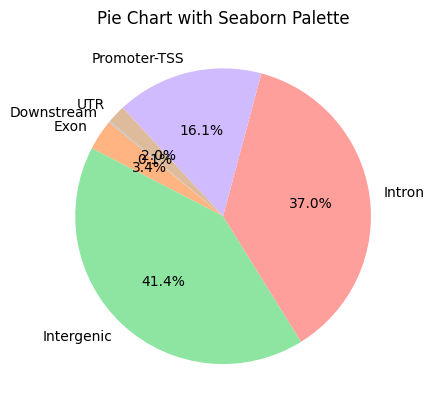

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = peakFraction['Var1']
sizes = peakFraction['Freq']
colors = sns.color_palette('pastel')[0:len(labels)]

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart with Seaborn Palette')
plt.show()